# Unsupervised Analysis of days of week

Treating crossings each day as features to learn relationships between the days

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Get Data

In [2]:
from data_package.data import get_fremont_data
data = get_fremont_data()

In [3]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(3588, 24)

In [5]:
X2 = PCA(2,svd_solver='full').fit_transform(X)
X2.shape

(3588, 2)

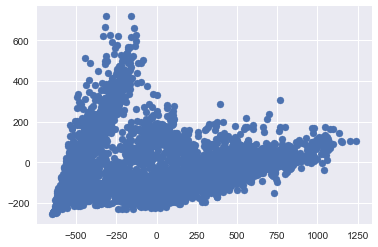

In [6]:
plt.scatter(X2[:,0],X2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

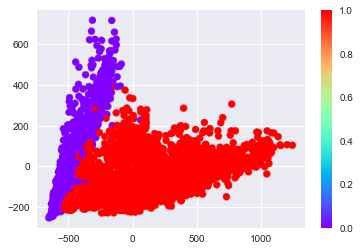

In [8]:
plt.scatter(X2[:,0],X2[:,1],c=labels , cmap="rainbow")
plt.colorbar()

<AxesSubplot:xlabel='time'>

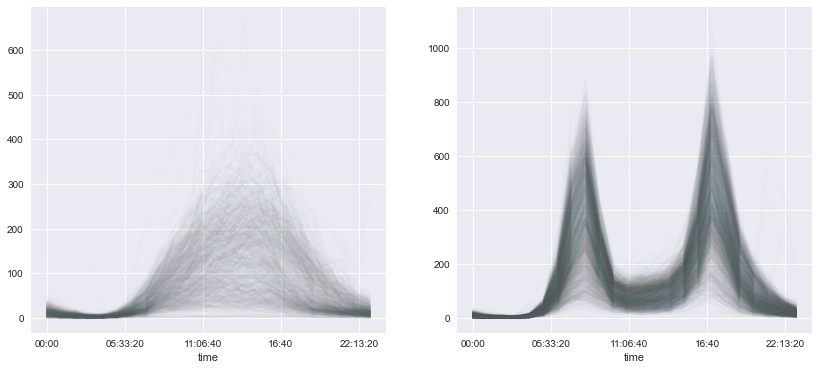

In [9]:
fig , ax = plt.subplots(1,2,figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False,alpha=0.01, ax = ax[0])
pivoted.T[labels==1].T.plot(legend=False,alpha=0.01, ax = ax[1])

## Comparing with day of the week

In [10]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

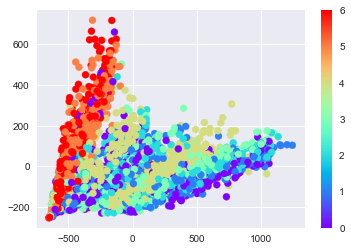

In [11]:
plt.scatter(X2[:,0],X2[:,1],c=day_of_week , cmap="rainbow")
plt.colorbar()

## Analysing Outliers

the following dates are weekdays with holiday like patterns

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==0) & (day_of_week<5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26',
               '2015-11-27', '2015-12-24', '2015-12-25', '2016-01-01',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-11-25', '2016-12-26', '2017-01-02', '2017-02-06',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-11-24', '2017-12-25', '2018-01-01', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-11-22', '2018-11-23',
               '2018-12-25', '2019-01-01', '2019-02-04', '2019-02-05',
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-05-27',
      

### for example in February 06 2017 
![Snow storm in seattle February 6th 2017](Capture.PNG)